In [1]:
from THM_main import Version5_THM_prototype
from iapws import IAPWS97
import numpy as np
from THM_main import plotting
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
# Begining of the script used to test the THM prototype class.

In [2]:
case_name = "NUPEC OECD BWR Benchmark"
#User choice:
solveConduction = False
plot_at_z1 = []

########## Thermal hydraulics parameters ##########
## Geometric parameters
canalType = "square"
waterRadius = 0.132284 # m
fuelRadius = 0.07/2 # m : fuel rod radius
#fuelRadius = 0.00208012
gapRadius = fuelRadius + 0.0000001  # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
cladRadius =  0.101153/2 # m : clad external radius
#waterRadius = 0.012044
#cladRadius = 0.00510157
height = 3.708 # m : height : active core height in BWRX-300 SMR

## Fluid parameters
pOutlet = 7195000 # Pa
hInlet_subcooled = 52 # kJ/kg
hsat = IAPWS97(P = pOutlet*10**(-6), x = 1).h # kJ/kg
tInlet = IAPWS97(P = pOutlet*10**(-6), h = hsat - hInlet_subcooled).T # K
tInlet = 550

#pressureDrop = 186737 #Pa/m
#falsePInlet = pOutlet + height * pressureDrop
#rhoInlet = IAPWS97(T = tInlet, P = falsePInlet*10**(-6)).rho #kg/m3
flowArea = waterRadius ** 2 - np.pi * cladRadius ** 2
qFlow = 54.59 # t/h
qFlow = qFlow * 10**3 / (3600) # kg/m2.s
power = 1.92 #MW
qFiss = power*10**6 / (height*fuelRadius**2) # W/m3
print(f'flowArea = {flowArea} m2')
print(f'qFlow = {qFlow} kg/m2.s')
print(f'Qfiss = {qFiss} W/m3')

## Meshing parameters:
If = 8
I1 = 3
Iz1 = 70 # number of control volumes in the axial direction

## Thermalhydraulics correlation
voidFractionCorrel = "EPRIvoidModel"    #choice between 'EPRIvoidModel' and 'GEramp' and 'modBestion' and 'HEM1'
frfaccorel = "Churchill"                #choice between 'Churchill' and 'blasius' 'base'
P2Pcorel = "lockhartMartinelli"                       #choice between 'HEM1' and 'HEM2' and 'MNmodel'
numericalMethod = 'FVM'            #choice between 'BiCG', 'BiCGStab', 'GaussSiedel' and 'FVM'

############ Nuclear Parameters ###########
## Fission parameters
#qFiss = 1943301220 # W/m3
## Material parameters
kFuel = 4.18 # W/m.K, TECHNICAL REPORTS SERIES No. 59 : Thermal Conductivity of Uranium Dioxide, IAEA, VIENNA, 1966
Hgap = 10000
kClad = 21.5 # W/m.K, Thermal Conductivity of Zircaloy-2 (as used in BWRX-300) according to https://www.matweb.com/search/datasheet.aspx?MatGUID=eb1dad5ce1ad4a1f9e92f86d5b44740d
# k_Zircaloy-4 = 21.6 W/m.K too so check for ATRIUM-10 clad material but should have the same thermal conductivity
########## Algorithm parameters ###########
nIter = 1000
tol = 1e-4

Qfiss1 = [qFiss] * Iz1

frfaccorel = "blasius"
P2Pcorel = "lockhartMartinelli"
case0 = Version5_THM_prototype(case_name, canalType,
                waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)
caseMerge = [case0]#, case1, case2, case3, case4, case5, case6, case7, case8]


flowArea = 0.009462918090159063 m2
qFlow = 15.16388888888889 kg/m2.s
Qfiss = 422693349.18433386 W/m3
$$$---------- THM: prototype, case treated : NUPEC OECD BWR Benchmark.
$$$---------- THM: prototype, steady state case.
$$---------- Calling DFM class.
Setting up heat convection solution along the axial dimension. zmax = 3.708 m with 70 axial elements.
self.I_z: 70
self.qFlow: 15.16388888888889
self.pOutlet: 7195000
self.Lf: 3.708
self.r_f: 0.035
self.clad_r: 0.0505765
self.r_w: 0.132284
self.Dz: 0.05297142857142857
self.dt: 0
Courant number: 0.0
Numerical Method FVM
Velocity at the inlet:  2.1123963528600243
cote: 0.132284
cladRadius: 0.0505765
Dh: 0.11911225095627673
Hydraulic diameter: [0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911225095627673, 0.11911

c:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\THM_waterProp.py:548: RuntimeWarning: divide by zero encountered in scalar divide
  return self.U[i] - (self.voidFractionTEMP[i] / ( 1 - self.voidFractionTEMP[i])) * (self.rhogTEMP[i] / self.rhoTEMP[i]) * self.VgjPrimeTEMP[i]


Convergence test, residuals: epsilon: 4.117874541774844, rho: 2876.7066246897953, xTh: 7.5599326312396125
uInlet:2.115408954147064
Inside resolveInversion
Inside resolveInversion
Convergence test, residuals: epsilon: 0.08848417144301911, rho: 61.879006145998886, xTh: 0.0008330673746113688
uInlet:2.115392982748788
Inside resolveInversion
Inside resolveInversion
Convergence test, residuals: epsilon: 0.012898485843386341, rho: 8.687527903220637, xTh: 0.0012365203431433198
uInlet:2.1153535249784996
Inside resolveInversion
Inside resolveInversion
Convergence test, residuals: epsilon: 0.0005885457600379321, rho: 0.39698612679486067, xTh: 0.0002462844958844696
uInlet:2.115351238997369
Inside resolveInversion
Inside resolveInversion
Convergence test, residuals: epsilon: 4.495561080907761e-05, rho: 0.030872879712988247, xTh: 1.5201291133859561e-05
uInlet:2.1153512138773674
Inside resolveInversion
Inside resolveInversion
Convergence test, residuals: epsilon: 4.5285706593432835e-06, rho: 0.003082

In [3]:

class GFPlotter():
    def __init__(self, caseList, directory_path, case_name):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height

        self.data_dict_list = []
        self.data_dict = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0] + self.alpha_vapour[0])

        self.calculateFields()
        self.createZ()

    def plotCase(self):
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        labelTitle = 'DFM'
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)

        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GenFoam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)

        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"DFM {self.caseList[i].convection_sol.frfaccorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight')
        

        plt.show()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid))

    def read_files_in_directory(self):
        data_dict = {}
        print(f"Reading files in directory: {self.directory_path}")
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(self.directory_path):
            file_path = os.path.join(self.directory_path, filename)
            print(f"Reading file: {file_path}")
            # Vérifie que c'est bien un fichier
            if os.path.isfile(file_path):

                with open(file_path, 'r') as file:
                    content = file.read()
                    
                    # Trouve la première parenthèse ouvrante et fermante
                    start = content.find('(')
                    end = content.find(')', start)
                    #end = start + 74
                    if start != -1 and end != -1:
                        # Extrait les données entre les parenthèses
                        data_str = content[start+1:end].strip()
                        # Divise les lignes en liste de chaînes
                        data_lines = data_str.splitlines()
                        if len(data_lines) != 1:
                            float_list = [float(item) for item in data_lines]
                            data_dict[filename] = float_list

                    if len(data_lines) == 1:
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(';', start)
                        #end = start
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            data_lines.pop()
                            x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                            for i in range(len(data_lines)):
                                a = values = data_lines[i].strip("()").split()
                                x[i] = float(a[0])
                                y[i] = float(a[1])
                                z[i] = float(a[2])
                            data_dict[fr'{filename}_x'] = x
                            data_dict[fr'{filename}_y'] = y
                            data_dict[fr'{filename}_z'] = z
        
        return data_dict
    
    def allow_space(self):
        self.alpha_liquid = np.array(self.data_dict['alpha.liquid'])
        self.alpha_vapour = np.array(self.data_dict['alpha.vapour'])
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = np.array(self.data_dict['alphaPhi.liquid']+ [self.data_dict['alphaPhi.liquid'][-1]])
        self.alphaPhi_vapour = np.array(self.data_dict['alphaPhi.vapour']+ [self.data_dict['alphaPhi.vapour'][-1]])
        self.alphaRhoMagU_liquid = np.array(self.data_dict['alphaRhoMagU.liquid'])#+ [self.data_dict['alphaRhoMagU.liquid'][-1]])
        self.alphaRhoMagU_vapour = np.array(self.data_dict['alphaRhoMagU.vapour'])#+ [self.data_dict['alphaRhoMagU.vapour'][-1]])
        self.alphaRhoPhi_liquid = np.array(self.data_dict['alphaRhoPhi.liquid']+ [self.data_dict['alphaRhoPhi.liquid'][-1]])
        self.alphaRhoPhi_vapour = np.array(self.data_dict['alphaRhoPhi.vapour']+ [self.data_dict['alphaRhoPhi.vapour'][-1]])
        self.areaDensity_interface = np.array(self.data_dict['areaDensity.interface'])
        self.dgdt_liquid = np.array(self.data_dict['dgdt.liquid'])
        self.dgdt_vapour = np.array(self.data_dict['dgdt.vapour'])
        self.dmdt_vapour = np.array(self.data_dict['dmdt.liquid.vapour'])
        self.heatFlux_structure = np.array(self.data_dict['heatFlux.structure'])
        self.htc_liquid_interface = np.array(self.data_dict['htc.liquid.interface'])
        self.htc_liquid_structure = np.array(self.data_dict['htc.liquid.structure'])
        self.p = np.array(self.data_dict['p'])
        self.p_rgh = np.array(self.data_dict['p_rgh'])
        self.Re_liquid_structure = np.array(self.data_dict['Re.liquid.structure'])
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = np.array(self.data_dict['Re.liquid.vapour'])
        self.T_fixedPower = np.array(self.data_dict['T.fixedPower'])
        self.T_liquid = np.array(self.data_dict['T.liquid'])
        self.T_vapour = np.array(self.data_dict['T.vapour'])
        self.U_liquid_x = np.array(self.data_dict['U.liquid_x'])
        self.U_liquid_y = np.array(self.data_dict['U.liquid_y'])
        self.U_liquid_z = np.array(self.data_dict['U.liquid_z'])
        self.U_vapour_x = np.array(self.data_dict['U.vapour_x'])
        self.U_vapour_y = np.array(self.data_dict['U.vapour_y'])
        self.U_vapour_z = np.array(self.data_dict['U.vapour_z'])

    def calculateFields(self):
        self.alpha_vapour = self.alpha_vapour/(1-self.struture_fraction)
        self.alpha_liquid = self.alpha_liquid/(1-self.struture_fraction)
        self.U_liquid = np.sqrt(self.U_liquid_x**2 + self.U_liquid_y**2 + self.U_liquid_z**2)
        self.U_vapour = np.sqrt(self.U_vapour_x**2 + self.U_vapour_y**2 + self.U_vapour_z**2)
        self.U_mixture = (1-self.alpha_vapour) * self.U_liquid + self.alpha_vapour * self.U_vapour

        self.rho_liquid  = self.alphaRhoPhi_liquid/(self.alphaPhi_liquid)
        self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)
        for i in range(len(self.rho_vapour)):
            if np.isnan(self.rho_vapour[i]):
                self.rho_vapour[i] = 0
            if np.isnan(self.rho_liquid[i]):
                self.rho_liquid[i] = 0
        print(f"rho_liquid GeN-Foam: {self.rho_liquid}")
        print(f"rho_vapour GeN-Foam: {self.rho_vapour}")
        self.rho_mixture = self.rho_liquid + self.rho_vapour

        self.T_mixture = (1-self.alpha_vapour) * self.T_liquid + self.alpha_vapour * self.T_vapour

    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        if len(self.caseList) == 1:
            labelTitle = 'DFM'
        labelTitle = 'DFM'
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
        ax1.step(self.zList, self.T_mixture, label="GenFoam T.mixture")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)
        ax2.step(self.zList, self.alpha_vapour, label="GenFoam")
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GeN-Foam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)
        ax3.plot(self.zList, self.rho_mixture, label="GenFoam")
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.plot(self.zList, self.rho_liquid, label="GenFoam")
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.plot(self.zList, self.rho_vapour, label="GenFoam")
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"DFM {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p, label="GenFoam")
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.step(self.zList, self.U_liquid, label="GenFoam")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.step(self.zList, self.U_vapour, label="GenFoam")
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.step(self.zList, self.U_mixture, label="GenFoam")
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.step(self.zList, self.Re_liquid_structure, label="GenFoam")
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight')
        

        plt.show()

    def computeErrors(self):
        self.error_T_abs = []
        self.error_T_rel = []
        self.error_p_abs = []
        self.error_p_rel = []
        self.error_rho_abs = []
        self.error_rho_rel = []
        self.error_U_abs = []
        self.error_U_rel = []
        self.error_Re_abs = []
        self.error_Re_rel = []
        self.error_eps_abs = []
        self.error_eps_rel = []

        for i in range(len(self.caseList)):
            self.error_T_abs.append((self.T_mixture - self.caseList[i].convection_sol.T_water))
            self.error_T_rel.append(100*self.error_T_abs[-1]/(self.T_mixture))
            self.error_p_abs.append((self.p - self.caseList[i].convection_sol.P[-1]))
            self.error_p_rel.append(100*self.error_p_abs[-1]/(self.p))
            self.error_rho_abs.append(self.rho_mixture - self.caseList[i].convection_sol.rho[-1])
            self.error_rho_rel.append(100*self.error_rho_abs[-1]/(self.rho_mixture))
            self.error_U_abs.append((self.U_mixture - self.caseList[i].convection_sol.U[-1]))
            self.error_U_rel.append(100*self.error_U_abs[-1]/(self.U_mixture))
            self.error_Re_abs.append((self.Re_liquid_structure - self.caseList[i].convection_sol.Rel))
            self.error_Re_rel.append(100*self.error_Re_abs[-1]/(self.Re_liquid_structure))
            self.error_eps_abs.append((self.alpha_vapour - self.caseList[i].convection_sol.voidFraction[-1]))
            self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))

            

    def plotErrorsPressure(self):
        fig, ax = plt.subplots()
        for i in range(len(self.caseList)):
            print(self.error_p_abs)
            ax.step(self.caseList[i].convection_sol.z_mesh, self.error_p_abs[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax.set_xlabel("Axial position in m")
        ax.set_ylabel("Absolute error in Pa")
        ax.set_title("Absolute error in pressure")
        ax.grid()
        ax.legend(loc="best")
        fig.savefig(rf'result\{self.case_name}\error_p_abs.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.error_p_rel[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Relative error in %")
        ax1.set_title("Relative error in pressure")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\error_p_rel.png', bbox_inches='tight')

        plt.show()

        for i in range(len(self.caseList)):
            print(f"Mean relative error in pressure: {np.mean(self.error_p_rel[i])}, max relative error in pressure {np.max(self.error_p_rel[i])} for {self.caseList[i].convection_sol.frfaccorel}, {self.caseList[i].convection_sol.P2Pcorel}")


Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alpha.liquid
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alpha.passiveStructure
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alpha.powerModel
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alpha.structure
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alpha.vapour
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0\alphaPhi.liquid
Reading file: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\ther

C:\Users\cleme\AppData\Local\Temp\ipykernel_9596\1505888548.py:264: RuntimeWarning: invalid value encountered in divide
  self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)


rho_liquid GeN-Foam: [678.35065597 678.21860877 678.03162989 677.79200778 677.49765847
 677.1531116  676.75852067 676.31624922 675.82430017 675.28507284
 674.69879518 674.07111234 673.39365612 672.67426707 671.91321816
 671.10864275 670.27051291 669.390552   668.47442018 667.52242371
 666.53912988 665.52482705 664.47981132 663.40859686 662.31145271
 661.18758144 660.04773963 658.89320339 657.72831955 656.55845563
 655.38892685 654.20622157 653.01252983 651.80066023 650.56548591
 649.30826204 648.03828582 646.76073593 645.48382415 644.2176703
 642.96217906 641.71922692 640.4864951  639.26581589 638.05288652
 636.85561667 635.68489231 634.55952063 633.48825357 632.48554458
 631.55204742 630.68398007 629.87678743 629.11992773 628.4040432
 627.72361094 627.07425153 626.45460784 625.86557374 625.30955771
 624.79231661 624.31848176 623.88299285 623.4972091  623.15722345
 622.86844449 622.63370075 622.461402   622.35587511 622.35587511]
rho_vapour GeN-Foam: [ 0.          0.          0.       

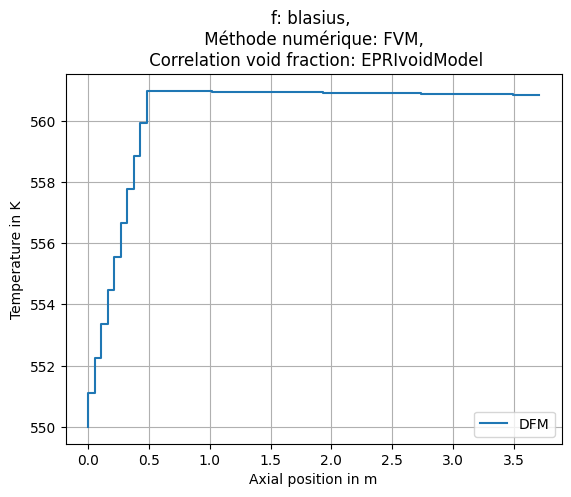

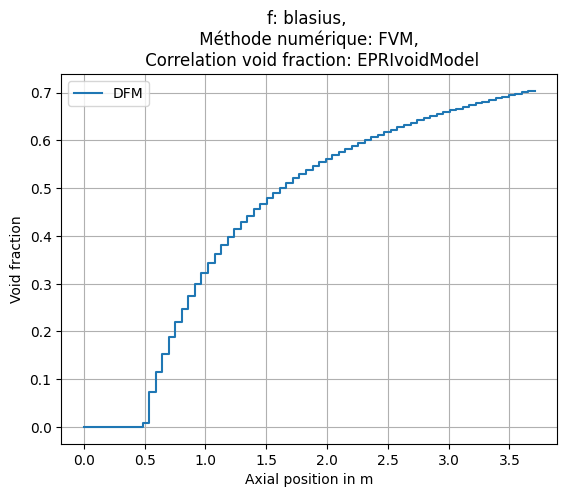

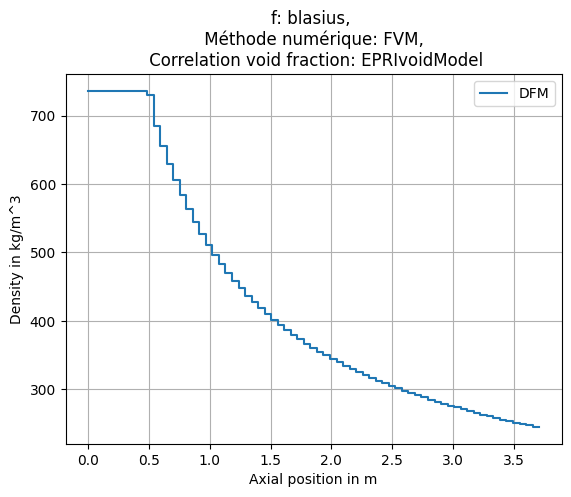

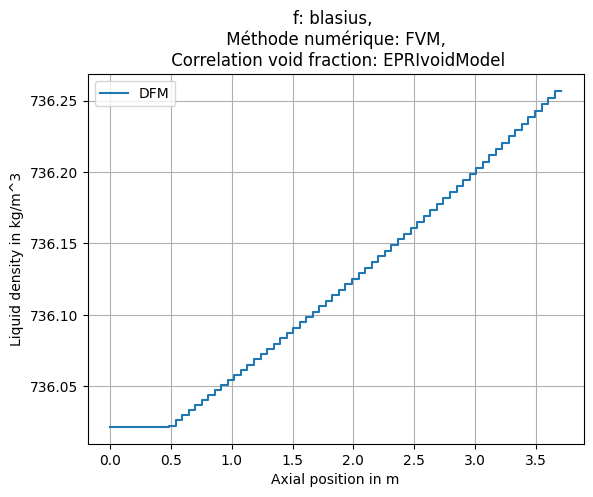

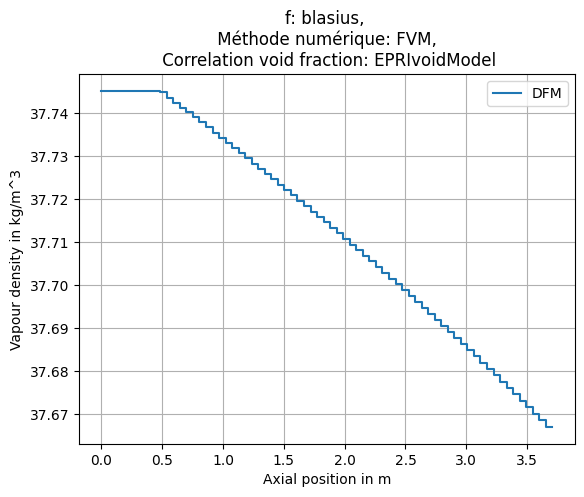

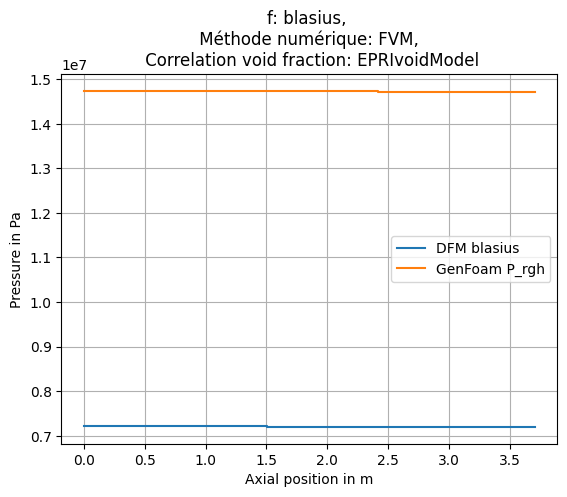

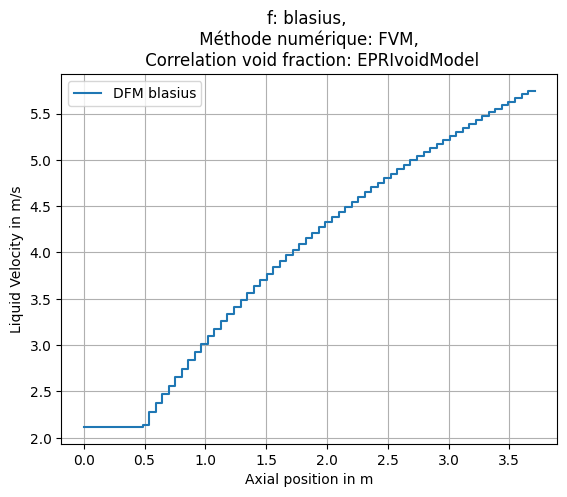

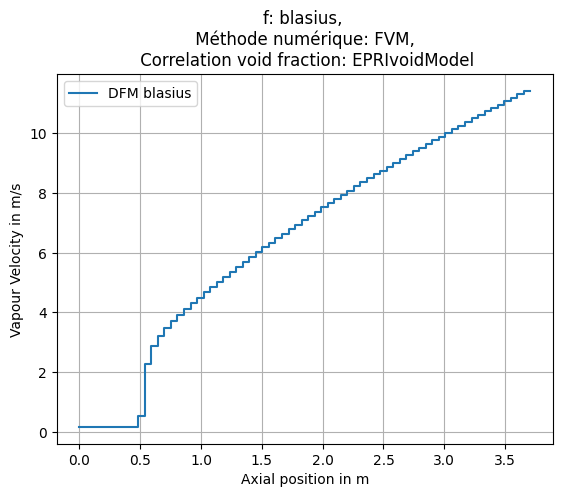

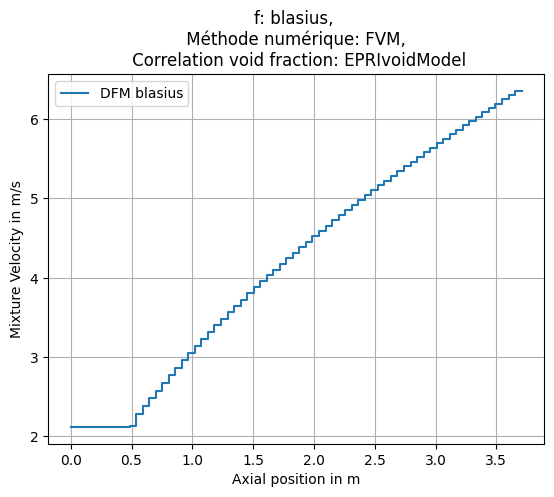

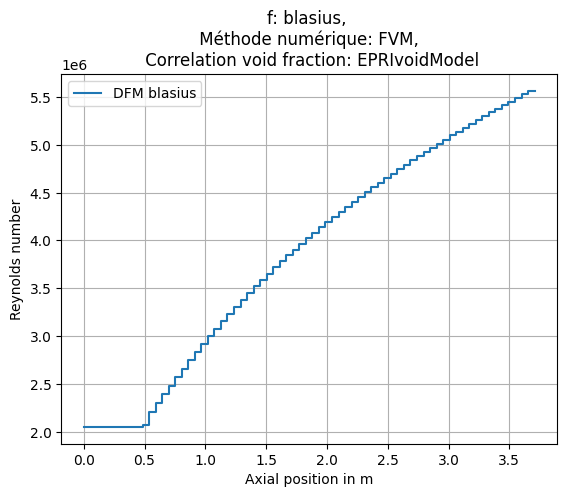

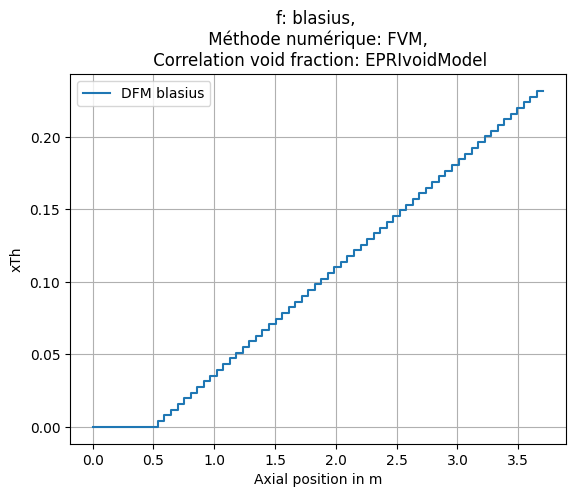

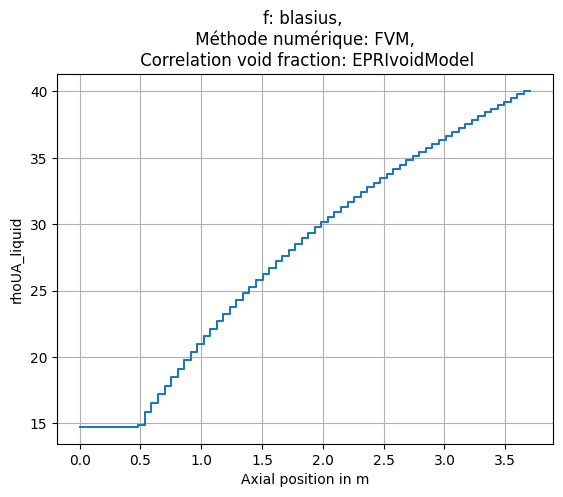

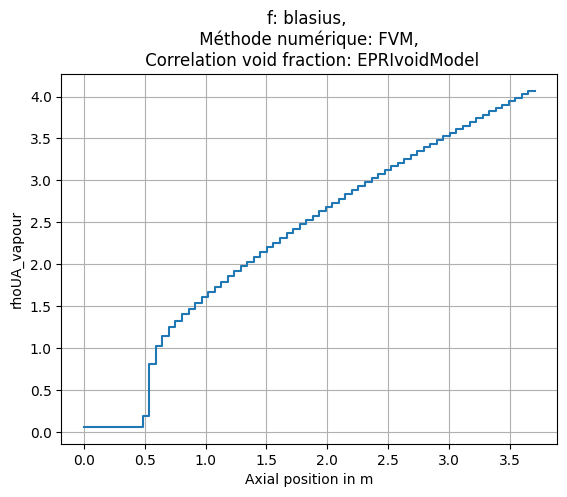

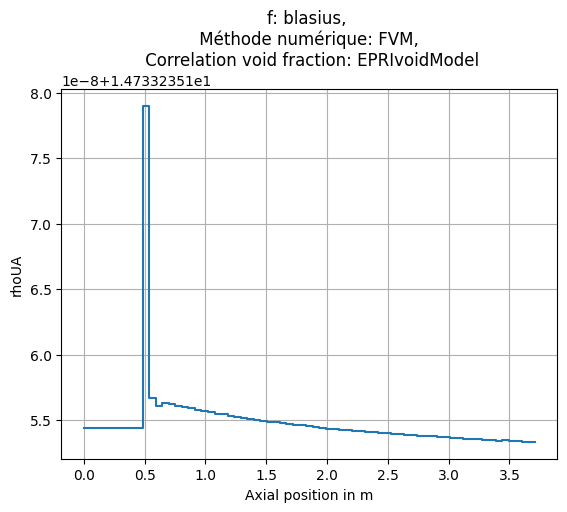

Umixture GeN-Foam: [4.46732    4.46798    4.46902    4.47044    4.4722     4.4743
 4.47674    4.47951    4.48261    4.48603    4.48977    4.49383
 4.49819    4.50285    4.50782    4.51307    4.5186     4.52441
 4.53049    4.53682    4.5434     4.55022    4.55726    4.56453
 4.57199    4.57965    4.58749    4.59549    4.60365    4.61195
 4.62037    4.62891    4.63753    4.64624    4.655      4.66382
 4.67266    4.68152    4.69038    4.69923054 4.70804111 4.71678138
 4.72544175 4.73401219 4.74247264 4.75080299 4.75899313 4.76702301
 4.77488264 4.78253212 4.78997156 4.79718106 4.80414066 4.81084038
 4.81726021 4.82338012 4.82920008 4.83470005 4.83987003 4.84470001
 4.84917    4.85328    4.85701    4.86036    4.86332    4.86587
 4.86802    4.86971    4.87091    4.87161   ]
zlist Plotter: [0.         0.05373913 0.10747826 0.16121739 0.21495652 0.26869565
 0.32243478 0.37617391 0.42991304 0.48365217 0.5373913  0.59113043
 0.64486957 0.6986087  0.75234783 0.80608696 0.85982609 0.91356522
 0.9

In [4]:
plotter = GFPlotter(caseMerge, rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I\PSBT_MPHYS_Q0', "PSBT_MPHYS_Q0")
#plotter.plotComparison()
#plotter.computeErrors()
#plotter.plotErrorsPressure()
plotter.plotCase()
print(f'Umixture GeN-Foam: {plotter.U_mixture}')
print(f'zlist Plotter: {plotter.zList}')
print(f'len zListplotter: {len(plotter.zList)}')
print(f'zList convection: {case0.convection_sol.z_mesh}')
print(f'len z list convection {len(case0.convection_sol.z_mesh)}')
#print(f'rhoua: {plotter.rhoUA}')  
print(f'rhoL GeN-Foam: {case0.convection_sol.rhoL[-1]}')
print(f'rhoG GeN-Foam: {case0.convection_sol.rhoG[-1]}')
print(f'rho GeN-Foam: {case0.convection_sol.rho[-1]}')

In [5]:
print(f'volume_fracion_fuel: {(fuelRadius ** 2) / ( cladRadius ** 2)}')
print(f'volume_fracion_clad: {(np.pi *cladRadius ** 2) / waterRadius ** 2}')
q = [flowArea * Qfiss1[i] / (np.pi * fuelRadius ** 2) for i in range(len(Qfiss1))]
print(Qfiss1)
for i in range(len(Qfiss1)):
    print(q[i])

volume_fracion_fuel: 0.47889306152659367
volume_fracion_clad: 0.45923267315587224
[422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.18433386, 422693349.1843338